# Домашнее задание "Производная функции нескольких аргументов".


In [11]:
import numpy as np
from scipy.optimize import approx_fprime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Вычислить вектор градиента и матрицу Гессе для функции:

$f(X)=2 x_{1}^{3}-3 x_{1} x_{2}+2 x_{2} x_{3}^{2}-x_{2}^{3}$

В точке M = (2, 1, 1)

$f'(x_{1})=2 x_{1}^{3}-3 x_{2} x_{1}+2 x_{2} x_{3}^{2}-x_{2}^{3}$

$=6 x_{1}^{2}-3 x_{2}$

$f'(x_{2})= -x_{2}^{3}+2 x_{3}^{2} x_{2}-3 x_{1} x_{2}+2 x_{1}^{3}$

$=-3 x_{2}^{2}+2 x_{3}^{2}-3 x_{1}$

$f'(x_{3})= 2 x_{2} x_{3}^{2}-x_{2}^{3}-3 x_{1} x_{2}+2 x_{1}^{3}$

$=4 x_{2} x_{3}$

In [12]:
def func(x):
    return 2 * x[0]**3 - 3 * x[0] * x[1] + 2 * x[1] * x[2]**2 - x[1]**3

In [13]:
def manual_grad(x):
    """
    Manual grad
    """
    x_1, x_2, x_3 = x[0], x[1], x[2]
    f1_x_1 = 6 * x_1**2 - 3 * x_2
    f1_x_2 = - 3 * x_2**2 + 2 * x_3**2 - 3 * x_1
    f1_x_3 = 4 * x_2 * x_3
    grad = np.array([f1_x_1, f1_x_2, f1_x_3])
    return grad

In [14]:
x = np.array([2,1,1])
assert np.allclose(manual_grad(x), approx_fprime(x,func, 0))
print(f'Градиент в точке {x} равен {manual_grad(x)}')

Градиент в точке [2 1 1] равен [21 -7  4]


Матрица Гессе:

$\left[\begin{array}{ccc}\frac{\partial^{2} f}
{\partial x_{1}^{2}} & \frac{\partial^{2} f}
{\partial x_{1} \partial x_{2}} & \frac{\partial^{2} f}
{\partial x_{1} \partial x_{3}} \\ \frac{\partial^{2} f}
{\partial x_{2} \partial x_{1}} & \frac{\partial^{2} f}
{\partial x_{2}^{2}} & \frac{\partial^{2} f}
{\partial x_{2} \partial x_{3}} \\ \frac{\partial^{2} f}
{\partial x_{3} \partial x_{1}} & \frac{\partial^{2} f}
{\partial x_{3} \partial x_{2}} & \frac{\partial^{2} f}
{\partial x_{3}^{2}}\end{array}\right]$

In [15]:
def f1_x_1(x):
    return 6 * x[0]**2 - 3 * x[1]

def f1_x_2(x):
    return - 3 * x[1]**2 + 2 * x[2]**2 - 3 * x[0]

def f1_x_3(x):
    return 4 * x[1] * x[2]

In [16]:
def hessian (x0, func, epsilon=0):
    """
    Manual calculation of the Hessian matrix
    """
    # First we have to find a gradient
    grad = approx_fprime(x0, func, epsilon=epsilon)
    # Then let find second
    f2_x_1 = approx_fprime(grad, f1_x_1, epsilon=epsilon)
    f2_x_2 = approx_fprime(grad, f1_x_2, epsilon=epsilon)
    f2_x_3 = approx_fprime(grad, f1_x_3, epsilon=epsilon)

    n = x0.shape[0]
    hessian = np.zeros ((n, n))

    hessian[:, 0] = f2_x_1
    hessian[:, 1] = f2_x_2
    hessian[:, 2] = f2_x_3

    return hessian

In [17]:
print(hessian(x, func))


[[252.0000059   -3.00000002   0.        ]
 [ -3.          42.00000054  16.        ]
 [  0.          16.         -28.        ]]


Постройте график трехмерный график функции:

$f(X)=x_{2}^{2}-x_{1}^{2} x_{2}+2 x_{1} x_{2}$

А также график линий уровня с уровнями {1,5,10}

In [18]:
def func_2(x_1, x_2):
    return x_2**2 - x_1**2 * x_2 + 2*x_1*x_2


<ipython-input-19-003e1741b7d8>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


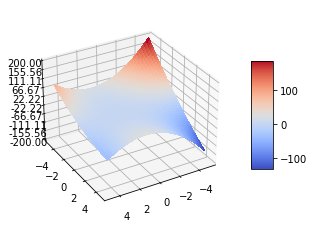

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y =np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)
Z = func_2(X, Y)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)

# Customize the z axis
ax.set_zlim(-200, 200.)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.azim = 60
ax.dist = 11
ax.elev = 30

plt.show()

<a list of 6 text.Text objects>

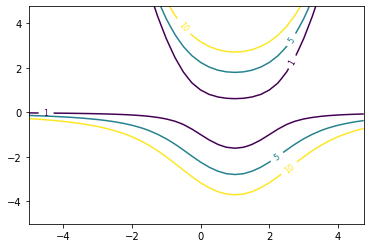

In [20]:
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z, [1,5,10])

ax.clabel(cs, inline=True, fontsize=8)

